In [ ]:
!unzip data.zip

In [5]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from PIL import Image 
import time 
from IPython import display

%matplotlib inline 

import utils as utils

tf.test.is_gpu_available()

True

# Residual Network - Gaussian corruption @ medium 

## Define model 
See `residual_network.py`

In [7]:
import residual_network
import importlib 
importlib.reload(residual_network)

<module 'residual_network' from '/content/residual_network.py'>

In [8]:
model = residual_network.ResidualAutoencoder_V2_64()
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## Dataset preparation  
This notebook is dedicated to operating on the (Gaussian noise - medium - 64x64) dataset.  

In [98]:
BATCH_SIZE = 32 
AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically
SHUFFLE_BUFFER_SIZE = 8    # Shuffle the training data by a chunck of this many observations

filenames = utils.get_filenames_list('data/dataset64-easy-gaus/')
train_ds = utils.create_dataset(filenames, SHUFFLE_BUFFER_SIZE, AUTOTUNE, BATCH_SIZE)

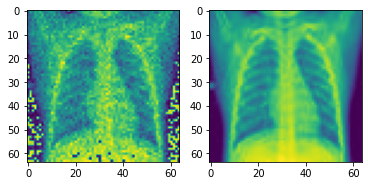

In [99]:
x = train_ds.take(1) 
for sample in x: 
    X = sample[0][0] 
    y = sample[1][0] 
    
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(np.squeeze(X))
    ax[1].imshow(np.squeeze(y))    

## Model training 

In [ ]:
EPOCHS = 200 

history = model.fit(train_ds, epochs=EPOCHS)

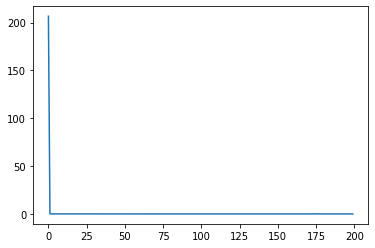

In [24]:
x_ = np.arange(0, EPOCHS)  
y_ = history.history['loss']  

plt.plot(x_, y_)

## Testing 

In [100]:
for i in train_ds.take(1): 
    ims = i[0]
    orgs = i[1]

preds = model.predict(ims)

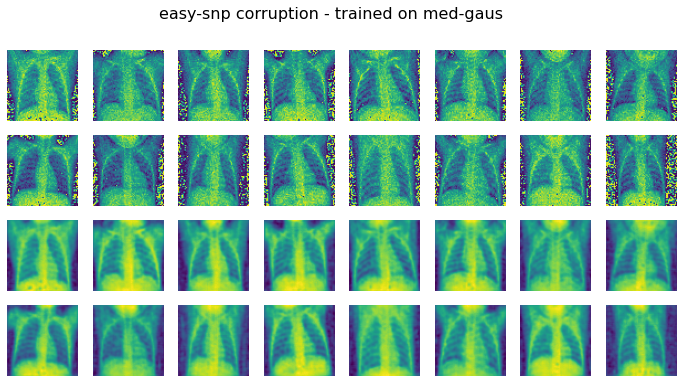

In [101]:
fig, axes = plt.subplots(4, 8, figsize=(12, 6))  
axes = axes.reshape(-1)  


for i, ax in enumerate(axes[:16]): 
    ax.imshow(np.squeeze(ims[i]))
    ax.axis(False)

for i, ax in enumerate(axes[16:]):
    ax.imshow(np.squeeze(preds[i]))
    ax.axis(False)

# plt.tight_layout()
fig.suptitle('easy-snp corruption - trained on med-gaus', fontsize=16); 

Text(0.5, 1.0, 'Original')

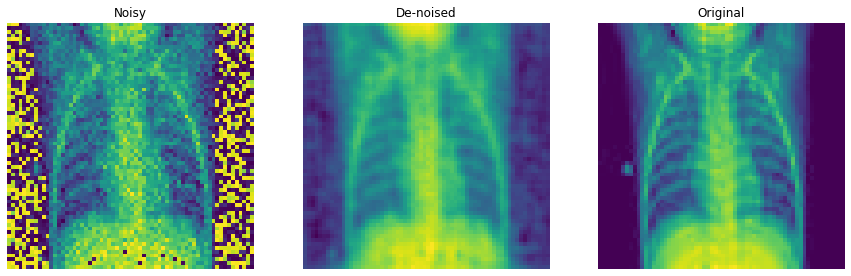

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
i = 15

axes[0].imshow(np.squeeze(ims[i]))
axes[0].axis(False)
axes[0].set_title('Noisy')

axes[1].imshow(np.squeeze(preds[i]))
axes[1].axis(False)
axes[1].set_title('De-noised')

axes[2].imshow(np.squeeze(orgs[i]))
axes[2].axis(False)
axes[2].set_title('Original')
